## SVM with Scikit-Learn Classification task

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("./mouse_viral_study.csv")
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


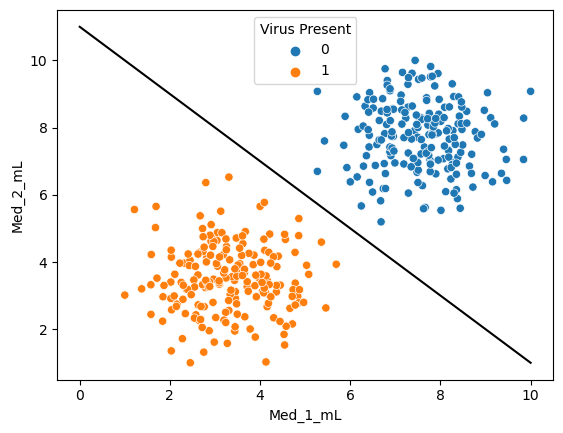

In [11]:
sns.scatterplot(x = "Med_1_mL" ,y = "Med_2_mL" ,hue = "Virus Present",data = df)

# Manual hyperplane

x = np.linspace(0,10,100)
m = -1

y = m*x + 11

plt.plot(x , y ,color = "black")

In [12]:
from sklearn.svm import SVC

In [49]:
model = SVC(kernel = "linear" ,C = 1000)

In [50]:
X= df.drop("Virus Present",axis = 1)
Y = df["Virus Present"]

model.fit(X ,Y)

SVC(C=1000, kernel='linear')

C:\Users\Barcha\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


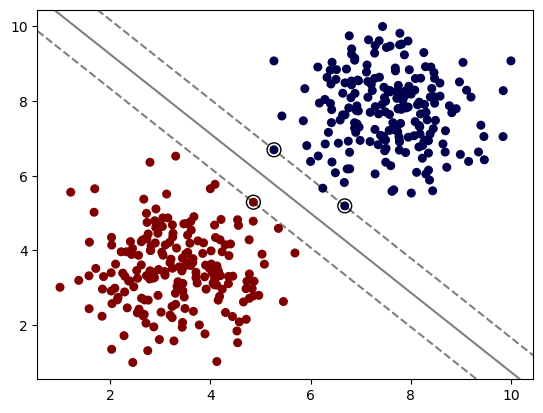

In [51]:
from svm_margin_plot import plot_svm_boundary

plot_svm_boundary(model ,X,Y)

C:\Users\Barcha\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


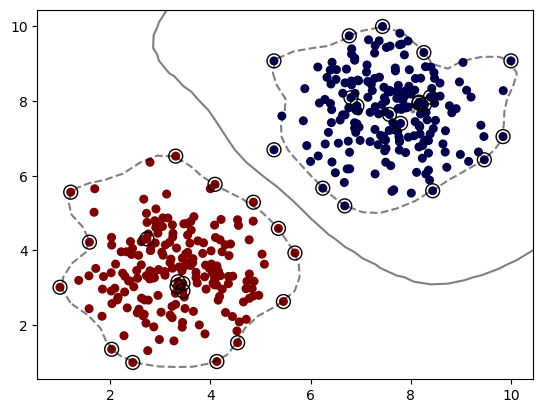

In [57]:
model = SVC(kernel = "rbf" ,C = 1 ,gamma = "auto")
model.fit(X,Y)
plot_svm_boundary(model ,X,Y)

C:\Users\Barcha\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


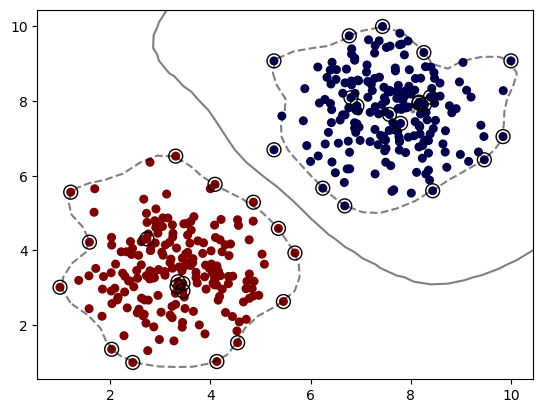

In [63]:
model = SVC(kernel = "rbf" ,C = 1 ,gamma = 0.5)
model.fit(X,Y)
plot_svm_boundary(model ,X,Y)

C:\Users\Barcha\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


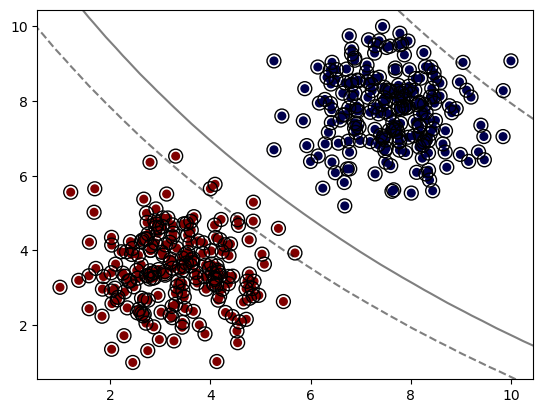

In [64]:
model = SVC(kernel = "sigmoid" ,C = 1 )
model.fit(X,Y)
plot_svm_boundary(model ,X,Y)

C:\Users\Barcha\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


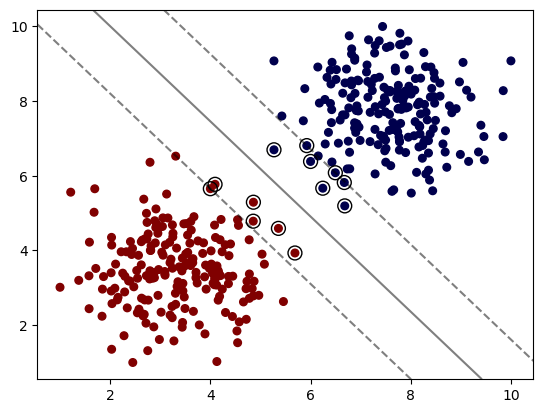

In [67]:
model = SVC(kernel = "poly" ,C = 1 ,degree = 1)
model.fit(X,Y)
plot_svm_boundary(model ,X,Y)

C:\Users\Barcha\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


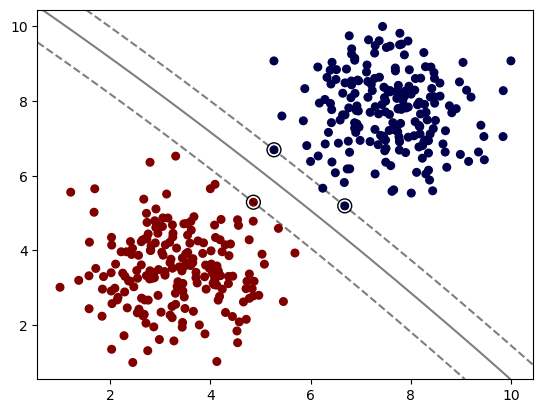

In [68]:
model = SVC(kernel = "poly" ,C = 1 ,degree = 3)
model.fit(X,Y)
plot_svm_boundary(model ,X,Y)

In [69]:
from sklearn.model_selection import GridSearchCV
svm = SVC()

In [82]:
params = {"kernel": ["linear" ,"rbf"] ,"C": [0.01 ,0.1 ,1,10]}
grid = GridSearchCV(svm ,param_grid = params)
grid.fit(X,Y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [83]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [84]:
grid.best_score_

1.0

## SVM With Scikit-Learn Regression Task

In [86]:
df = pd.read_csv("./cement_slump.csv")
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [88]:
x = df.drop("Compressive Strength (28-day)(Mpa)" , axis = 1)
y = df["Compressive Strength (28-day)(Mpa)"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

scaler = StandardScaler()

x_scaled_train = scaler.fit_transform(X_train)
x_scaled_test = scaler.transform(X_test)

In [89]:
from sklearn.svm import SVR ,LinearSVR

In [90]:
help(SVR)

Help on class SVR in module sklearn.svm._classes:

class SVR(sklearn.base.RegressorMixin, sklearn.svm._base.BaseLibSVM)
 |  SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
 |  
 |  Epsilon-Support Vector Regression.
 |  
 |  The free parameters in the model are C and epsilon.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to datasets with more than a couple of 10000 samples. For large
 |  datasets consider using :class:`~sklearn.svm.LinearSVR` or
 |  :class:`~sklearn.linear_model.SGDRegressor` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  Read more in the :ref:`User Guide <svm_regression>`.
 |  
 |  Parameters
 |  ----------
 |  kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomput

In [92]:
baseModel = SVR()
baseModel.fit(x_scaled_train ,y_train)
y_preds = baseModel.predict(x_scaled_test)


In [93]:
from sklearn.metrics import mean_absolute_error ,mean_squared_error

In [94]:
mean_absolute_error(y_test ,y_preds)

5.259533818550809

In [95]:
np.sqrt(mean_squared_error(y_test ,y_preds))

6.672771747495873

In [96]:
y.mean()

36.03873786407767

### USe GridSearchCv

In [107]:
svr1 = SVR()
params = {"C":[0.001,0.01,0.1,1],
          "kernel": ["rbf","linear","poly"],
         "gamma": ["scale","auto"],
         "epsilon": [0,0.02,0.5,2,5]}

In [108]:
gridSVR = GridSearchCV(svr1 ,params)
gridSVR.fit(x_scaled_train ,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'epsilon': [0, 0.02, 0.5, 2, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'poly']})

In [109]:
gridSVR.best_params_

{'C': 1, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [110]:
gridSVR.best_score_

0.7872220914010232

In [112]:
y_preds = gridSVR.predict(x_scaled_test)
mean_absolute_error(y_test ,y_preds)


1.9861144916476572

In [113]:
np.sqrt(mean_squared_error(y_test ,y_preds))

2.4536572286987144

In [114]:
gridSVR.score(x_scaled_test ,y_test)

0.9101930354447605